In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [141]:
def mean_squared_error(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return (mean_error)

In [142]:
class LinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.01, n_iterations=500):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return error / len(y)
    
    def fit(self, X, y):
        # 1. Initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
        
        
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [143]:
df = pd.read_csv("/content/FoDS-Assignment-2.csv")

In [144]:
df.dropna(axis=0,inplace=True)

In [145]:
df_z_scaled = df.copy()
  
# apply normalization techniques
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    
  
# view normalized data   
df=(df_z_scaled)

In [146]:
shuffle_df = df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.7 * len(df))

# Split your dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [147]:
X_train = train_set.drop("price", 1)       
y_train = train_set['price']     
X_val = test_set.drop("price", 1)       
y_val = test_set['price']

In [148]:
xx=X_train.to_numpy()
yy=y_train.to_numpy()

In [149]:
xxv=X_val.to_numpy()

In [150]:
lreg = LinearRegression()
lreg.fit(xx,yy)
y_val_pred = lreg.predict(xxv)

In [151]:
y_train_pred=lreg.predict(xx)

In [152]:
train_error = mean_squared_error(y_train.to_numpy(), y_train_pred)

In [153]:
validation_error = mean_squared_error(y_val.to_numpy(), y_val_pred)

In [154]:
print(validation_error,train_error)

0.37748446014280174 0.39885409968121144


In [155]:
df = pd.read_csv("/content/FoDS-Assignment-2.csv")

In [156]:
df.dropna(axis=0,inplace=True)

In [157]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

bedrooms              1.00
bathrooms             0.75
sqft_living        1181.50
sqft_lot           5528.50
floors                1.00
waterfront            0.00
view                  0.00
condition             1.00
grade                 1.00
sqft_above         1070.00
sqft_basement       560.00
sqft_living15       920.00
sqft_lot15         4822.50
price            330000.00
dtype: float64


In [158]:
try:
  print(df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))
except:
  pass

      bedrooms  bathrooms  sqft_living  ...  sqft_living15  sqft_lot15  price
0        False      False        False  ...          False       False  False
1        False      False        False  ...          False       False  False
2        False      False        False  ...          False       False  False
3        False      False        False  ...          False       False  False
4        False      False        False  ...          False       False  False
...        ...        ...          ...  ...            ...         ...    ...
1183     False      False        False  ...          False       False  False
1184     False      False        False  ...          False       False  False
1185     False      False        False  ...          False       False  False
1186     False      False        False  ...          False       False  False
1187     False      False        False  ...          False       False  False

[1147 rows x 14 columns]


In [159]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(801, 14)

In [160]:
df_z_scaled = df.copy()
  
# apply normalization techniques
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    
  
# view normalized data   
df=(df_z_scaled)

In [161]:
print(df)

      bedrooms  bathrooms  sqft_living  ...  sqft_living15  sqft_lot15     price
0     0.679815  -0.499098     0.004468  ...      -0.692746   -0.201925 -0.248147
1     0.679815   0.472280     0.067317  ...       0.543848   -0.116214 -0.178373
2    -0.398674  -0.822890    -0.603070  ...      -0.605457   -0.171536 -0.952343
3    -0.398674   1.767449     0.276813  ...       0.762070   -0.326776 -0.139610
4     0.679815   0.472280     0.119691  ...       0.369270   -0.152497 -0.578925
...        ...        ...          ...  ...            ...         ...       ...
1183  0.679815   0.472280     0.531351  ...      -0.008983   -0.292762 -0.558252
1184 -1.477164  -0.175305    -0.404049  ...      -0.925517   -0.327142 -0.255899
1185  0.679815   0.472280     0.968151  ...       1.489479   -0.188012  0.586552
1186  0.679815  -0.822890     0.035893  ...      -0.372687   -0.097102 -0.385110
1187 -0.398674  -1.470475    -0.959214  ...      -0.998258   -0.156891 -0.463928

[1147 rows x 14 columns]


In [162]:
shuffle_df = df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.7 * len(df))

# Split your dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [163]:
X_train = train_set.drop("price", 1)       
y_train = train_set['price']     
X_val = test_set.drop("price", 1)       
y_val = test_set['price']  

In [164]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((802, 13), (345, 13), (802,), (345,))

In [165]:
xx=X_train.to_numpy()
yy=y_train.to_numpy()

In [166]:
xxv=X_val.to_numpy()

In [167]:
lreg = LinearRegression()
lreg.fit(xx,yy)
y_val_pred = lreg.predict(xxv)

In [168]:
validation_error = mean_squared_error(y_val.to_numpy(), y_val_pred)

In [169]:
print(validation_error)

0.34800601812927867


In [170]:
def fit_model(best_features, new_column):
  lreg = LinearRegression()
  lreg.fit(X_train[best_features+[new_column]].to_numpy(), y_train.to_numpy()) 
  y_val_pred = lreg.predict(X_val[best_features+[new_column]].to_numpy())
  validation_error = mean_squared_error(y_val.to_numpy(), y_val_pred)

  return validation_error

In [171]:
def forward_selection():
  initial_features = X_train.columns.tolist()
  best_features = []
  min_mse_dict={}
  remaining_features=initial_features
  while (len(remaining_features)>1):
    remaining_features = list(set(initial_features)-set(best_features)) 
    mse_series = pd.Series(index=remaining_features,dtype='float64')
    for new_column in remaining_features:
        validation_error = fit_model(best_features, new_column)
        mse_series[new_column] = validation_error
    min_mse = mse_series.min()
    best_features.append(mse_series.idxmin())
    min_mse_dict[",".join(best_features)]=min_mse

  return min_mse_dict
  


In [172]:
def fit_model_backward(best_features, new_column):
  lreg = LinearRegression()
  best_features.remove(new_column)
  lreg.fit(X_train[best_features].to_numpy(), y_train.to_numpy()) 
  y_val_pred = lreg.predict(X_val[best_features].to_numpy())
  validation_error = mean_squared_error(y_val.to_numpy(), y_val_pred)

  return validation_error

In [173]:
def backward_selection():
  initial_features = X_train.columns.tolist()
  best_features = []
  min_mse_dict={}
  remaining_features=initial_features
  while (len(remaining_features)>1):
    remaining_features = list(set(initial_features)-set(best_features))
    mse_series = pd.Series(index=remaining_features,dtype='float64')
    for new_column in remaining_features:
        validation_error = fit_model_backward(remaining_features, new_column)
        mse_series[new_column] = validation_error
    min_mse = mse_series.min()
    best_features.append(mse_series.idxmin())
    min_mse_dict[",".join(best_features)]=min_mse
  return min_mse_dict

In [174]:
min_mse_dict = forward_selection()
res = min(min_mse_dict, key=min_mse_dict.get)
print(f'The best set of features are {res} with a MSE of {min(min_mse_dict.values())}')

The best set of features are grade,view,sqft_living15,condition,sqft_lot15,floors,sqft_lot with a MSE of 0.30019450442881046


In [175]:
min_mse_dict

{'grade': 0.4030463628334561,
 'grade,view': 0.3343006488252862,
 'grade,view,sqft_living15': 0.3131322733809378,
 'grade,view,sqft_living15,condition': 0.3041406220950529,
 'grade,view,sqft_living15,condition,sqft_lot15': 0.30081521216061763,
 'grade,view,sqft_living15,condition,sqft_lot15,floors': 0.30031648748829426,
 'grade,view,sqft_living15,condition,sqft_lot15,floors,sqft_lot': 0.30019450442881046,
 'grade,view,sqft_living15,condition,sqft_lot15,floors,sqft_lot,bedrooms': 0.30252389010471276,
 'grade,view,sqft_living15,condition,sqft_lot15,floors,sqft_lot,bedrooms,sqft_basement': 0.30288934546329455,
 'grade,view,sqft_living15,condition,sqft_lot15,floors,sqft_lot,bedrooms,sqft_basement,bathrooms': 0.3066848959454682,
 'grade,view,sqft_living15,condition,sqft_lot15,floors,sqft_lot,bedrooms,sqft_basement,bathrooms,waterfront': 0.31446260512945196,
 'grade,view,sqft_living15,condition,sqft_lot15,floors,sqft_lot,bedrooms,sqft_basement,bathrooms,waterfront,sqft_living': 0.33142280505

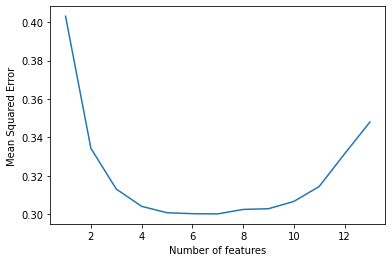

In [176]:
# Plot the minimum validation errors as a function of increasing number of predictors
fig, ax = plt.subplots()

# Plot the validation error with labels
x, y = zip(*sorted(min_mse_dict.items())) 
ax.plot(range(1,X_train.shape[1]+1),y)

# Set the plot labels
ax.set_xlabel('Number of features')
ax.set_ylabel('Mean Squared Error')
plt.show();

In [177]:
min_mse_dict = backward_selection()
res = min(min_mse_dict, key=min_mse_dict.get)
print(f'The features which need to be removed {res} to get a best MSE of {min(min_mse_dict.values())}')

The features which need to be removed sqft_living,sqft_living15,bedrooms,floors,sqft_lot15 to get a best MSE of 0.315722639524327


In [178]:
min_mse_dict

{'sqft_living': 0.33105525349518466,
 'sqft_living,sqft_living15': 0.3178516843349706,
 'sqft_living,sqft_living15,bedrooms': 0.3178516843349706,
 'sqft_living,sqft_living15,bedrooms,floors': 0.3157226395243271,
 'sqft_living,sqft_living15,bedrooms,floors,sqft_lot15': 0.315722639524327,
 'sqft_living,sqft_living15,bedrooms,floors,sqft_lot15,view': 0.356316694707831,
 'sqft_living,sqft_living15,bedrooms,floors,sqft_lot15,view,grade': 0.4044953597166754,
 'sqft_living,sqft_living15,bedrooms,floors,sqft_lot15,view,grade,condition': 0.4080526553266545,
 'sqft_living,sqft_living15,bedrooms,floors,sqft_lot15,view,grade,condition,sqft_lot': 0.4080526553266545,
 'sqft_living,sqft_living15,bedrooms,floors,sqft_lot15,view,grade,condition,sqft_lot,sqft_above': 0.5075386424676267,
 'sqft_living,sqft_living15,bedrooms,floors,sqft_lot15,view,grade,condition,sqft_lot,sqft_above,waterfront': 0.5109451194616506}

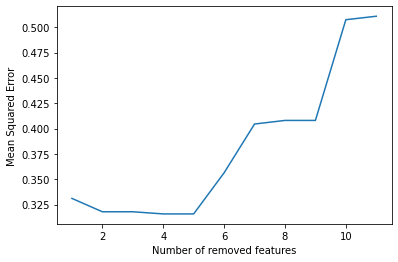

In [179]:
# Plot the minimum validation errors as a function of increasing number of predictors
fig, ax = plt.subplots()

# Plot the validation error with labels
x, y = zip(*sorted(min_mse_dict.items())) 
ax.plot(range(1,X_train.shape[1]-1),y)

# Set the plot labels
ax.set_xlabel('Number of removed features')
ax.set_ylabel('Mean Squared Error')
plt.show();

In [180]:
lreg = LinearRegression()
lreg.fit(X_train[["sqft_living","view","grade","sqft_basement","condition","bathrooms","sqft_living15","floors"]].to_numpy(), y_train.to_numpy()) 
y_val_pred = lreg.predict(X_val[["sqft_living","view","grade","sqft_basement","condition","bathrooms","sqft_living15","floors"]].to_numpy())
validation_error = mean_squared_error(y_val.to_numpy(), y_val_pred)
y_train_pred=lreg.predict(X_train[["sqft_living","view","grade","sqft_basement","condition","bathrooms","sqft_living15","floors"]].to_numpy())
train_error = mean_squared_error(y_train.to_numpy(), y_train_pred)

In [181]:
train_error

0.435260742044719

In [182]:
validation_error

0.3264836055489279

In [183]:
lreg = LinearRegression()
lreg.fit(X_train[["bedrooms","bathrooms","sqft_living","view","grade","sqft_basement","sqft_living15"]].to_numpy(), y_train.to_numpy()) 
y_val_pred = lreg.predict(X_val[["bedrooms","bathrooms","sqft_living","view","grade","sqft_basement","sqft_living15"]].to_numpy())
validation_error = mean_squared_error(y_val.to_numpy(), y_val_pred)
y_train_pred=lreg.predict(X_train[["bedrooms","bathrooms","sqft_living","view","grade","sqft_basement","sqft_living15"]].to_numpy())
train_error = mean_squared_error(y_train.to_numpy(), y_train_pred)

In [184]:
train_error

0.42719276307467036

In [185]:
validation_error

0.33180352506164656